In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
listings_dec_df=pd.read_csv(r"listings.csv")
reviews_df=pd.read_csv(r'reviews.csv')

In [3]:
listings_dec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91031 entries, 0 to 91030
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              91031 non-null  int64  
 1   name                            91031 non-null  object 
 2   host_id                         91031 non-null  int64  
 3   host_name                       91022 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   91031 non-null  object 
 6   latitude                        91031 non-null  float64
 7   longitude                       91031 non-null  float64
 8   room_type                       91031 non-null  object 
 9   price                           60093 non-null  float64
 10  minimum_nights                  91031 non-null  int64  
 11  number_of_reviews               91031 non-null  int64  
 12  last_review                     

In [4]:
listings_dec_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5396,Your perfect Paris studio on Île Saint-Louis,7903,Borzou,NaN,Hôtel-de-Ville,48.85247,2.35835,Entire home/apt,88.0,3,425,2024-11-23,2.26,1,77,51,7510402838018
1,7964,Sunny apartment with balcony,22155,Anaïs,NaN,Opéra,48.87417,2.34245,Entire home/apt,NaN,7,5,2015-09-14,0.03,1,0,0,7510903576564
2,9952,Paris petit coin douillet,33534,Elisabeth,NaN,Popincourt,48.86238,2.36957,Entire home/apt,150.0,4,52,2024-09-24,0.36,1,250,3,7511101582862
3,11487,"Heart of Paris, brand new aparment.",42666,Brigitte,NaN,Popincourt,48.86351,2.37110,Entire home/apt,80.0,30,13,2024-09-27,0.09,2,246,5,"Available with a mobility lease only (""bail mo..."
4,12452,Voltaire Charm,48733,Irene,NaN,Popincourt,48.85974,2.37932,Entire home/apt,201.0,1,62,2024-10-11,0.77,1,34,4,7511102600669


In [5]:
listings_dec_df.nunique()

id                                91031
name                              84017
host_id                           67331
host_name                         12082
neighbourhood_group                   0
neighbourhood                        20
latitude                          44086
longitude                         49960
room_type                             4
price                              1272
minimum_nights                      106
number_of_reviews                   591
last_review                        3310
reviews_per_month                   905
calculated_host_listings_count       97
availability_365                    366
number_of_reviews_ltm               143
license                           60921
dtype: int64

In [6]:
cols_to_drop=['name','host_name','neighbourhood_group','license']

# neighbourhood 
# room_type
# last_review

df=listings_dec_df.drop(columns=cols_to_drop)

In [7]:
df['neighbourhood']=df['neighbourhood'].astype('string')
df['room_type']=df['room_type'].astype('string')
df['last_review']=pd.to_datetime(df['last_review'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91031 entries, 0 to 91030
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              91031 non-null  int64         
 1   host_id                         91031 non-null  int64         
 2   neighbourhood                   91031 non-null  string        
 3   latitude                        91031 non-null  float64       
 4   longitude                       91031 non-null  float64       
 5   room_type                       91031 non-null  string        
 6   price                           60093 non-null  float64       
 7   minimum_nights                  91031 non-null  int64         
 8   number_of_reviews               91031 non-null  int64         
 9   last_review                     67176 non-null  datetime64[ns]
 10  reviews_per_month               67176 non-null  float64       
 11  ca

In [9]:
# check if columns are relevant

# Checking the unique values and their counts for each column
columns_to_check = ['neighbourhood','room_type']

for column in columns_to_check:
    print(f"Column: {column}")
    unique_values = df[column].unique()  # Get unique values
    print(f"Number of unique values: {len(unique_values)}")
    print("Unique values:")
    print(unique_values)
    print("\n")

Column: neighbourhood
Number of unique values: 20
Unique values:
<StringArray>
[     'Hôtel-de-Ville',               'Opéra',          'Popincourt',
   'Buttes-Montmartre',     'Buttes-Chaumont',              'Louvre',
             'Reuilly',              'Élysée',            'Panthéon',
            'Entrepôt',           'Vaugirard',      'Palais-Bourbon',
              'Bourse',               'Passy',              'Temple',
        'Ménilmontant', 'Batignolles-Monceau',          'Luxembourg',
        'Observatoire',            'Gobelins']
Length: 20, dtype: string


Column: room_type
Number of unique values: 4
Unique values:
<StringArray>
['Entire home/apt', 'Private room', 'Shared room', 'Hotel room']
Length: 4, dtype: string




In [10]:
df.head(30)

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,5396,7903,Hôtel-de-Ville,48.852470,2.358350,Entire home/apt,88.0,3,425,2024-11-23,2.26,1,77,51
1,7964,22155,Opéra,48.874170,2.342450,Entire home/apt,NaN,7,5,2015-09-14,0.03,1,0,0
2,9952,33534,Popincourt,48.862380,2.369570,Entire home/apt,150.0,4,52,2024-09-24,0.36,1,250,3
3,11487,42666,Popincourt,48.863510,2.371100,Entire home/apt,80.0,30,13,2024-09-27,0.09,2,246,5
4,12452,48733,Popincourt,48.859740,2.379320,Entire home/apt,201.0,1,62,2024-10-11,0.77,1,34,4
5,14264,55995,Buttes-Montmartre,48.882590,2.342510,Entire home/apt,NaN,365,10,2020-03-14,0.07,1,180,0
6,17287,64055,Buttes-Chaumont,48.897720,2.385080,Entire home/apt,82.0,4,48,2024-11-01,0.39,1,234,15
7,17994,69389,Louvre,48.861850,2.343400,Entire home/apt,1200.0,4,202,2023-06-25,1.12,1,365,0
8,21004,79843,Reuilly,48.837970,2.400580,Entire home/apt,200.0,2,129,2024-08-07,0.72,6,324,6
9,22158,84874,Élysée,48.870390,2.322730,Private room,150.0,2,108,2024-10-18,0.74,1,86,14


As the Olympics only last for less than a month, long-term airbnb options shouldn't be affected, and thus are irrelevant to our analysis.

9.788972987224133


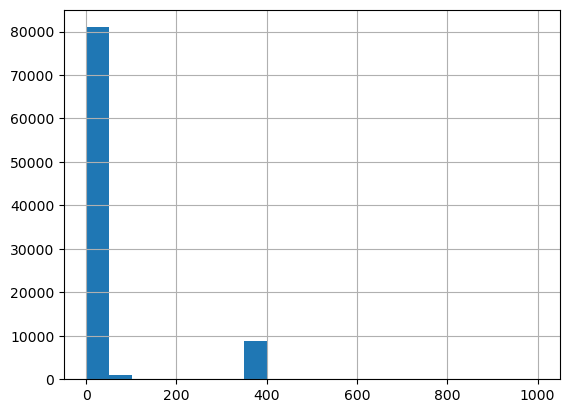

In [11]:
df['minimum_nights'].hist(bins=20)
# Percentage of listings with more than 200 minimum nights.
percentage = (df['minimum_nights'] > 200).mean() * 100
print(percentage)

In [12]:
# Dropping columns, where minimum nights are more than 200, considering them as long-term, thus unaffected by the Olympics

df = df[df['minimum_nights'] <= 200]

# Percentage of listings with more than 200 minimum nights.
percentage = (df['minimum_nights'] > 200).mean() * 100
print(percentage)
df.info()

0.0
<class 'pandas.core.frame.DataFrame'>
Index: 82120 entries, 0 to 91030
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              82120 non-null  int64         
 1   host_id                         82120 non-null  int64         
 2   neighbourhood                   82120 non-null  string        
 3   latitude                        82120 non-null  float64       
 4   longitude                       82120 non-null  float64       
 5   room_type                       82120 non-null  string        
 6   price                           59421 non-null  float64       
 7   minimum_nights                  82120 non-null  int64         
 8   number_of_reviews               82120 non-null  int64         
 9   last_review                     61917 non-null  datetime64[ns]
 10  reviews_per_month               61917 non-null  float64       
 11  cal

In [13]:
# Although removing 9.78% of total items, only 0.011182 (1.1%) prices were removed, thus indicating their vast majority, did not have a price.

# Checking further on Price distribution:

<Axes: ylabel='price'>

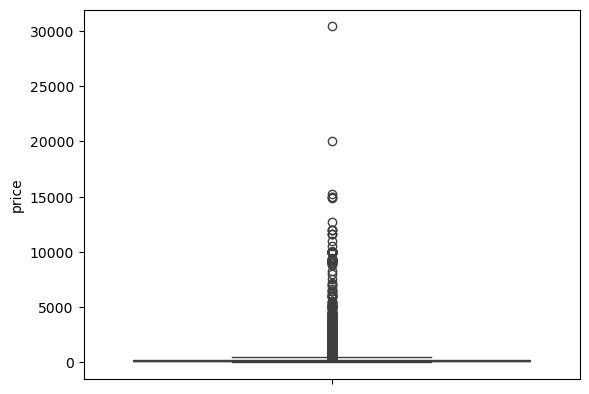

In [14]:
sns.boxplot(y=df['price'])

<Axes: >

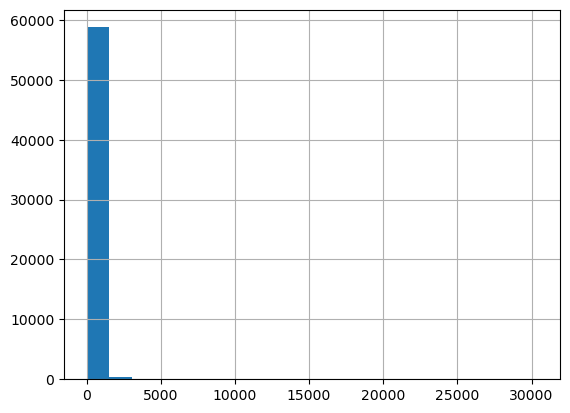

In [15]:
df['price'].hist(bins=20)

In [16]:
# Calculate the 99.95th percentile of the price column
top_9995_percentile = df['price'].quantile(0.9995)

# Filter the listings with prices in the top 0.05% percentile
top_0005_percent_prices = df[df['price'] >= top_9995_percentile]

# Print the 99.95th percentile value and the top listings
print(f"99.95th Percentile of Prices: {top_9995_percentile}")
print("Listings in the Top 0.0005% of Prices:")
print(top_0005_percent_prices[['id', 'price']].head(1000))

99.95th Percentile of Prices: 9999.0
Listings in the Top 0.0005% of Prices:
                        id    price
7747               8495380  10000.0
21369             29021769  12000.0
26139             37281603  12000.0
32484             49621582   9999.0
32485             49621583   9999.0
...                    ...      ...
90717  1299402030167390191  12000.0
90789  1299281278784885967   9999.0
90790  1299288272718208906   9999.0
90793  1299314091363362098   9999.0
90833  1300559732504046020   9999.0

[111 rows x 2 columns]


In [17]:
# Calculate the 0.005th percentile of the price column
min_0005_percentile = df['price'].quantile(0.0005)

# Filter the listings with prices in the top 0.05% percentile
min_0005_percent_prices = df[df['price'] <= min_0005_percentile]

# Print the 0.0005th percentile value and the top listings
print(f"99.95th Percentile of Prices: {min_0005_percentile}")
print("Listings in the Min 0.0005% of Prices:")
print(min_0005_percent_prices[['id', 'price']].count())

99.95th Percentile of Prices: 25.0
Listings in the Min 0.0005% of Prices:
id       42
price    42
dtype: int64


In [18]:
# Confirm the filtering
print(f"Original number of listings: {df.shape[0]}")

# Remove rows corresponding to the top 0.05% of prices
df = df[~df.index.isin(top_0005_percent_prices.index)]

print(f"Number of listings after dropping top 0.05%: {df.shape[0]}")

Original number of listings: 82120
Number of listings after dropping top 0.05%: 82009


In [19]:
# Confirm the filtering
print(f"Original number of listings: {df.shape[0]}")

# Remove rows corresponding to the top 0.05% of prices
df = df[~df.index.isin(min_0005_percent_prices.index)]

print(f"Number of listings after dropping min 0.05%: {df.shape[0]}")

Original number of listings: 82009
Number of listings after dropping min 0.05%: 81967


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81967 entries, 0 to 91030
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              81967 non-null  int64         
 1   host_id                         81967 non-null  int64         
 2   neighbourhood                   81967 non-null  string        
 3   latitude                        81967 non-null  float64       
 4   longitude                       81967 non-null  float64       
 5   room_type                       81967 non-null  string        
 6   price                           59268 non-null  float64       
 7   minimum_nights                  81967 non-null  int64         
 8   number_of_reviews               81967 non-null  int64         
 9   last_review                     61845 non-null  datetime64[ns]
 10  reviews_per_month               61845 non-null  float64       
 11  calcula

In [21]:
df.isnull().sum()

id                                    0
host_id                               0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                             22699
minimum_nights                        0
number_of_reviews                     0
last_review                       20122
reviews_per_month                 20122
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
dtype: int64

In [22]:
print("\nMissing value percentages:")
df.isnull().sum()/len(df)*100


Missing value percentages:


id                                 0.000000
host_id                            0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                             27.692852
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       24.548904
reviews_per_month                 24.548904
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64

In [23]:
# Attemtping to examine possible patterns of missing data, to minimize data loss
df[(df['price'].isna()) & (df['last_review'].isna()) & (df['availability_365']==0)]

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
75,161703,773449,Buttes-Montmartre,48.885410,2.344950,Private room,NaN,15,0,NaT,NaN,1,0,0
103,17316,67192,Entrepôt,48.871720,2.361840,Entire home/apt,NaN,3,0,NaT,NaN,1,0,0
109,25819,108444,Entrepôt,48.871510,2.357370,Private room,NaN,3,0,NaT,NaN,1,0,0
181,324431,1613616,Hôtel-de-Ville,48.851380,2.363610,Entire home/apt,NaN,14,0,NaT,NaN,1,0,0
315,285108,1484225,Buttes-Chaumont,48.885840,2.388370,Private room,NaN,3,0,NaT,NaN,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89657,1282736499588740660,488440720,Louvre,48.861480,2.349700,Entire home/apt,NaN,1,0,NaT,NaN,1,0,0
89663,1282799028168347328,556602917,Buttes-Chaumont,48.877900,2.395216,Private room,NaN,1,0,NaT,NaN,4,0,0
89739,1282433421362084439,652724638,Buttes-Chaumont,48.880198,2.395367,Entire home/apt,NaN,30,0,NaT,NaN,1,0,0
89905,1285307525574160352,223142940,Élysée,48.881323,2.325482,Private room,NaN,3,0,NaT,NaN,1,0,0


Viewing the significance of the price variable, we are unable to correlate data when Null items are inplace. Thus, although dropping 27.4% of the total items, we contend the remaining 72.6% to be representative of our analysis.

In [24]:
df['price'].dropna()

0         88.0
2        150.0
3         80.0
4        201.0
6         82.0
         ...  
91026    100.0
91027     80.0
91028    818.0
91029    840.0
91030     66.0
Name: price, Length: 59268, dtype: float64

In [25]:
df=df.dropna(subset=['price'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59268 entries, 0 to 91030
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              59268 non-null  int64         
 1   host_id                         59268 non-null  int64         
 2   neighbourhood                   59268 non-null  string        
 3   latitude                        59268 non-null  float64       
 4   longitude                       59268 non-null  float64       
 5   room_type                       59268 non-null  string        
 6   price                           59268 non-null  float64       
 7   minimum_nights                  59268 non-null  int64         
 8   number_of_reviews               59268 non-null  int64         
 9   last_review                     44448 non-null  datetime64[ns]
 10  reviews_per_month               44448 non-null  float64       
 11  calcula

In [27]:
# We disregard the missing values on last_review and reviews_per_month as some listings may not have a review, which stands to reason.

In [28]:
df.head(30) 

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,5396,7903,Hôtel-de-Ville,48.852470,2.358350,Entire home/apt,88.0,3,425,2024-11-23,2.26,1,77,51
2,9952,33534,Popincourt,48.862380,2.369570,Entire home/apt,150.0,4,52,2024-09-24,0.36,1,250,3
3,11487,42666,Popincourt,48.863510,2.371100,Entire home/apt,80.0,30,13,2024-09-27,0.09,2,246,5
4,12452,48733,Popincourt,48.859740,2.379320,Entire home/apt,201.0,1,62,2024-10-11,0.77,1,34,4
6,17287,64055,Buttes-Chaumont,48.897720,2.385080,Entire home/apt,82.0,4,48,2024-11-01,0.39,1,234,15
7,17994,69389,Louvre,48.861850,2.343400,Entire home/apt,1200.0,4,202,2023-06-25,1.12,1,365,0
8,21004,79843,Reuilly,48.837970,2.400580,Entire home/apt,200.0,2,129,2024-08-07,0.72,6,324,6
9,22158,84874,Élysée,48.870390,2.322730,Private room,150.0,2,108,2024-10-18,0.74,1,86,14
10,24151,89209,Panthéon,48.844060,2.345390,Entire home/apt,150.0,3,24,2024-10-12,0.14,1,364,2
12,26562,107514,Vaugirard,48.853160,2.291140,Entire home/apt,180.0,4,167,2024-08-04,0.94,1,3,1


In [29]:
# Grouping the data

grouped_df = df.groupby('neighbourhood').agg(
    average_price=('price', 'mean'),
    average_other_minimum_nights=('minimum_nights', 'mean'))

grouped_df.head(20)

,average_price,average_other_minimum_nights
neighbourhood,,
Batignolles-Monceau,241.315236,7.596967
Bourse,236.177311,6.948739
Buttes-Chaumont,179.943866,5.023193
Buttes-Montmartre,174.593607,5.581938
Entrepôt,194.208473,5.190648
Gobelins,170.099441,5.844693
Hôtel-de-Ville,258.078000,9.780000
Louvre,304.992352,7.196941
Luxembourg,306.464620,10.144641


Importing the calendar csv, in order to link the prices given in this dataset, broken down into months. Doing so will allow us to seperate the months, and thus see the before-during-after relation of price.

We assume that the effective prices in June July and August will be the same as the ones listed in the calendar dataset from March

In [30]:
calendar=pd.read_csv(r"good_march_calendar.csv")

C:\Users\Stelios PC\AppData\Local\Temp\ipykernel_5152\3959171453.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  calendar=pd.read_csv(r"good_march_calendar.csv")


In [31]:
calendar.head(100)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,3109,2024-03-19,f,$250.00,NaN,2.0,30.0
1,3109,2024-03-20,t,$250.00,NaN,2.0,30.0
2,3109,2024-03-21,t,$250.00,NaN,2.0,30.0
3,3109,2024-03-22,t,$250.00,NaN,2.0,30.0
4,3109,2024-03-23,t,$250.00,NaN,2.0,30.0
...,...,...,...,...,...,...,...
95,3109,2024-06-22,t,$250.00,NaN,2.0,30.0
96,3109,2024-06-23,t,$250.00,NaN,2.0,30.0
97,3109,2024-06-24,t,$250.00,NaN,2.0,30.0
98,3109,2024-06-25,t,$250.00,NaN,2.0,30.0


In [32]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30804889 entries, 0 to 30804888
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.6+ GB


In [33]:
calendar= calendar.drop(columns=['adjusted_price','minimum_nights','maximum_nights','available'])

calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float)

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Stelios PC\AppData\Local\Temp\ipykernel_5152\3850693040.py:3: SyntaxWarning: invalid escape sequence '\$'
  calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float)


In [34]:
calendar.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30804889 entries, 0 to 30804888
Data columns (total 3 columns):
 #   Column      Dtype  
---  ------      -----  
 0   listing_id  int64  
 1   date        object 
 2   price       float64
dtypes: float64(1), int64(1), object(1)
memory usage: 705.1+ MB


In [35]:
calendar['date']=pd.to_datetime(calendar['date'])

In [36]:
calendar.info()
calendar.head(30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30804889 entries, 0 to 30804888
Data columns (total 3 columns):
 #   Column      Dtype         
---  ------      -----         
 0   listing_id  int64         
 1   date        datetime64[ns]
 2   price       float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 705.1 MB


,listing_id,date,price
0,3109,2024-03-19,250.0
1,3109,2024-03-20,250.0
2,3109,2024-03-21,250.0
3,3109,2024-03-22,250.0
4,3109,2024-03-23,250.0
5,3109,2024-03-24,250.0
6,3109,2024-03-25,250.0
7,3109,2024-03-26,250.0
8,3109,2024-03-27,250.0
9,3109,2024-03-28,250.0


In [37]:
calendar=calendar[(calendar['date'].dt.month.isin([6, 7, 8])) & (calendar['date'].dt.year == 2024)]

In [38]:
calendar.head(30)

,listing_id,date,price
74,3109,2024-06-01,250.0
75,3109,2024-06-02,250.0
76,3109,2024-06-03,250.0
77,3109,2024-06-04,250.0
78,3109,2024-06-05,250.0
79,3109,2024-06-06,250.0
80,3109,2024-06-07,250.0
81,3109,2024-06-08,250.0
82,3109,2024-06-09,250.0
83,3109,2024-06-10,250.0


In [39]:
calendar['month'] = calendar['date'].dt.month

#grouping by id and month and then calculating the average price
avg_prices = calendar.groupby(['listing_id', 'month'])['price'].mean().reset_index()

#pivoting the  table
avg_prices_pivot = avg_prices.pivot(index='listing_id', columns='month', values='price')

#change name
avg_prices_pivot = avg_prices_pivot.rename(columns={6: 'June_avg_price', 7: 'July_avg_price', 8: 'August_avg_price'})
avg_prices_pivot.columns.name = None #delete the name of the index

#reset the index to get listing_id as a column
avg_prices_pivot = avg_prices_pivot.reset_index()

avg_prices_pivot.head(10)

,listing_id,June_avg_price,July_avg_price,August_avg_price
0,3109,250.0,250.0,250.0
1,5396,150.0,150.0,150.0
2,7397,130.0,130.0,130.0
3,7964,180.0,180.0,180.0
4,9359,75.0,75.0,75.0
5,9952,80.0,80.0,80.0
6,10586,80.0,80.0,80.0
7,10588,75.0,75.0,75.0
8,11265,145.0,145.0,145.0
9,11487,60.0,60.0,60.0


In [40]:
combined_df=pd.merge(df,avg_prices_pivot, left_on='id',right_on='listing_id',how='inner')
combined_df

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,listing_id,June_avg_price,July_avg_price,August_avg_price
0,5396,7903,Hôtel-de-Ville,48.852470,2.358350,Entire home/apt,88.0,3,425,2024-11-23,2.26,1,77,51,5396,150.0,150.0,150.0
1,9952,33534,Popincourt,48.862380,2.369570,Entire home/apt,150.0,4,52,2024-09-24,0.36,1,250,3,9952,80.0,80.0,80.0
2,11487,42666,Popincourt,48.863510,2.371100,Entire home/apt,80.0,30,13,2024-09-27,0.09,2,246,5,11487,60.0,60.0,60.0
3,12452,48733,Popincourt,48.859740,2.379320,Entire home/apt,201.0,1,62,2024-10-11,0.77,1,34,4,12452,200.0,200.0,200.0
4,17287,64055,Buttes-Chaumont,48.897720,2.385080,Entire home/apt,82.0,4,48,2024-11-01,0.39,1,234,15,17287,89.0,89.0,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38905,1112874033769166914,563392445,Buttes-Montmartre,48.892186,2.346931,Entire home/apt,138.0,30,2,2024-11-30,0.23,6,360,2,1112874033769166914,102.0,102.0,102.0
38906,1112876048231231888,563392445,Buttes-Montmartre,48.892186,2.346931,Entire home/apt,89.0,30,4,2024-11-04,0.46,6,260,4,1112876048231231888,102.0,102.0,102.0
38907,1112876049566081626,563392445,Buttes-Montmartre,48.892186,2.346931,Entire home/apt,147.0,30,5,2024-08-18,0.58,6,350,5,1112876049566081626,102.0,102.0,102.0
38908,1112876050328173970,563392445,Buttes-Montmartre,48.892186,2.346931,Entire home/apt,147.0,30,5,2024-09-18,0.58,6,360,5,1112876050328173970,102.0,102.0,102.0


We combine the two datasets: First one stemming from listings.csv and the second from calendar.csv in order to get the prices per month, and be able to make further comparisons.

In [41]:
# We remove one of the IDs
combined_df=combined_df.drop(columns=['listing_id'])
combined_df.head(30)

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,June_avg_price,July_avg_price,August_avg_price
0,5396,7903,Hôtel-de-Ville,48.852470,2.358350,Entire home/apt,88.0,3,425,2024-11-23,2.26,1,77,51,150.0,150.0,150.0
1,9952,33534,Popincourt,48.862380,2.369570,Entire home/apt,150.0,4,52,2024-09-24,0.36,1,250,3,80.0,80.0,80.0
2,11487,42666,Popincourt,48.863510,2.371100,Entire home/apt,80.0,30,13,2024-09-27,0.09,2,246,5,60.0,60.0,60.0
3,12452,48733,Popincourt,48.859740,2.379320,Entire home/apt,201.0,1,62,2024-10-11,0.77,1,34,4,200.0,200.0,200.0
4,17287,64055,Buttes-Chaumont,48.897720,2.385080,Entire home/apt,82.0,4,48,2024-11-01,0.39,1,234,15,89.0,89.0,89.0
5,17994,69389,Louvre,48.861850,2.343400,Entire home/apt,1200.0,4,202,2023-06-25,1.12,1,365,0,1200.0,1200.0,1200.0
6,21004,79843,Reuilly,48.837970,2.400580,Entire home/apt,200.0,2,129,2024-08-07,0.72,6,324,6,200.0,200.0,200.0
7,22158,84874,Élysée,48.870390,2.322730,Private room,150.0,2,108,2024-10-18,0.74,1,86,14,150.0,150.0,150.0
8,26562,107514,Vaugirard,48.853160,2.291140,Entire home/apt,180.0,4,167,2024-08-04,0.94,1,3,1,180.0,180.0,180.0
9,27288,77087,Buttes-Chaumont,48.887060,2.372610,Entire home/apt,150.0,5,76,2024-10-08,0.46,1,70,5,150.0,150.0,150.0


In [42]:
#Creating a sub-df for the EDA with all non-numeric columns
numeric_df=combined_df.select_dtypes(include=[np.number])
numeric_df=numeric_df.drop(columns=['id','host_id','latitude','longitude'])
numeric_df

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,June_avg_price,July_avg_price,August_avg_price
0,88.0,3,425,2.26,1,77,51,150.0,150.0,150.0
1,150.0,4,52,0.36,1,250,3,80.0,80.0,80.0
2,80.0,30,13,0.09,2,246,5,60.0,60.0,60.0
3,201.0,1,62,0.77,1,34,4,200.0,200.0,200.0
4,82.0,4,48,0.39,1,234,15,89.0,89.0,89.0
...,...,...,...,...,...,...,...,...,...,...
38905,138.0,30,2,0.23,6,360,2,102.0,102.0,102.0
38906,89.0,30,4,0.46,6,260,4,102.0,102.0,102.0
38907,147.0,30,5,0.58,6,350,5,102.0,102.0,102.0
38908,147.0,30,5,0.58,6,360,5,102.0,102.0,102.0


Exploratory Data Analysis

In [43]:
# Calculating the descriptive statistics

col_means=numeric_df.mean()


In [44]:
#Calculating the mean, and variance.

for col_name in numeric_df.columns:
    column = numeric_df[col_name].tolist() # Convert column to list
    
    # Calculate mean
    total = 0
    n = len(column)
    for value in column:
        total += value
    mean = total / n
    
    # Calculate variance
    squared_diff_sum = 0
    for value in column:
        diff = value - mean
        squared_diff = diff * diff
        squared_diff_sum += squared_diff
    variance = squared_diff_sum / n
    
    # Calculate standard deviation
    std = variance ** 0.5

    #print results
    print(f"\n{col_name}:")
    print(f"Mean: {mean:.6f}")
    print(f"Variance: {variance:.6f}")
    print(f"Standard Deviation: {std:.6f}")


price:
Mean: 236.747314
Variance: 109471.120781
Standard Deviation: 330.864203

minimum_nights:
Mean: 7.259342
Variance: 222.592803
Standard Deviation: 14.919544

number_of_reviews:
Mean: 39.351324
Variance: 5936.508029
Standard Deviation: 77.048738

reviews_per_month:
Mean: nan
Variance: nan
Standard Deviation: nan

calculated_host_listings_count:
Mean: 32.566435
Variance: 13855.335024
Standard Deviation: 117.708687

availability_365:
Mean: 195.732254
Variance: 15078.922350
Standard Deviation: 122.796264

number_of_reviews_ltm:
Mean: 9.799923
Variance: 236.503300
Standard Deviation: 15.378664

June_avg_price:
Mean: 317.810235
Variance: 1124761.121481
Standard Deviation: 1060.547557

July_avg_price:
Mean: 318.771495
Variance: 1135024.739484
Standard Deviation: 1065.375398

August_avg_price:
Mean: 319.146051
Variance: 1142055.774067
Standard Deviation: 1068.670096


In [45]:
# Loop through each pair of columns
for col1 in numeric_df.columns:
    column1 = numeric_df[col1].tolist()  # Convert first column to list
    
    # Calculate mean of first column
    total1 = 0
    n = len(column1)
    for value in column1:
        total1 += value
    mean1 = total1 / n
    
    for col2 in numeric_df.columns:
        column2 = numeric_df[col2].tolist()  # Convert second column to list
        
        # Calculate mean of second column
        total2 = 0
        for value in column2:
            total2 += value
        mean2 = total2 / n
        
        # Calculate covariance
        sum_of_products = 0
        for i in range(n):
            diff1 = column1[i] - mean1
            diff2 = column2[i] - mean2
            product = diff1 * diff2
            sum_of_products += product
        covariance = sum_of_products / n
        
        # Calculate std for correlation
        squared_diff_sum1 = 0
        squared_diff_sum2 = 0
        for i in range(n):
            diff1 = column1[i] - mean1
            diff2 = column2[i] - mean2
            squared_diff_sum1 += diff1 * diff1
            squared_diff_sum2 += diff2 * diff2
        std1 = (squared_diff_sum1 / n) ** 0.5
        std2 = (squared_diff_sum2 / n) ** 0.5
        
        # Calculate correlation
        correlation = covariance / (std1 * std2)
        
        print(f"\n{col1} and {col2}:")
        print(f"Covariance: {covariance:.6f}")
        print(f"Correlation: {correlation:.6f}")


price and price:
Covariance: 109471.120781
Correlation: 1.000000

price and minimum_nights:
Covariance: -397.427220
Correlation: -0.080510

price and number_of_reviews:
Covariance: -2325.435127
Correlation: -0.091220

price and reviews_per_month:
Covariance: nan
Correlation: nan

price and calculated_host_listings_count:
Covariance: -1167.675991
Correlation: -0.029982

price and availability_365:
Covariance: 5087.060563
Correlation: 0.125208

price and number_of_reviews_ltm:
Covariance: -622.414396
Correlation: -0.122324

price and June_avg_price:
Covariance: 115962.223147
Correlation: 0.330473

price and July_avg_price:
Covariance: 118907.442713
Correlation: 0.337331

price and August_avg_price:
Covariance: 120308.059924
Correlation: 0.340252

minimum_nights and price:
Covariance: -397.427220
Correlation: -0.080510

minimum_nights and minimum_nights:
Covariance: 222.592803
Correlation: 1.000000

minimum_nights and number_of_reviews:
Covariance: -143.662766
Correlation: -0.124975

min

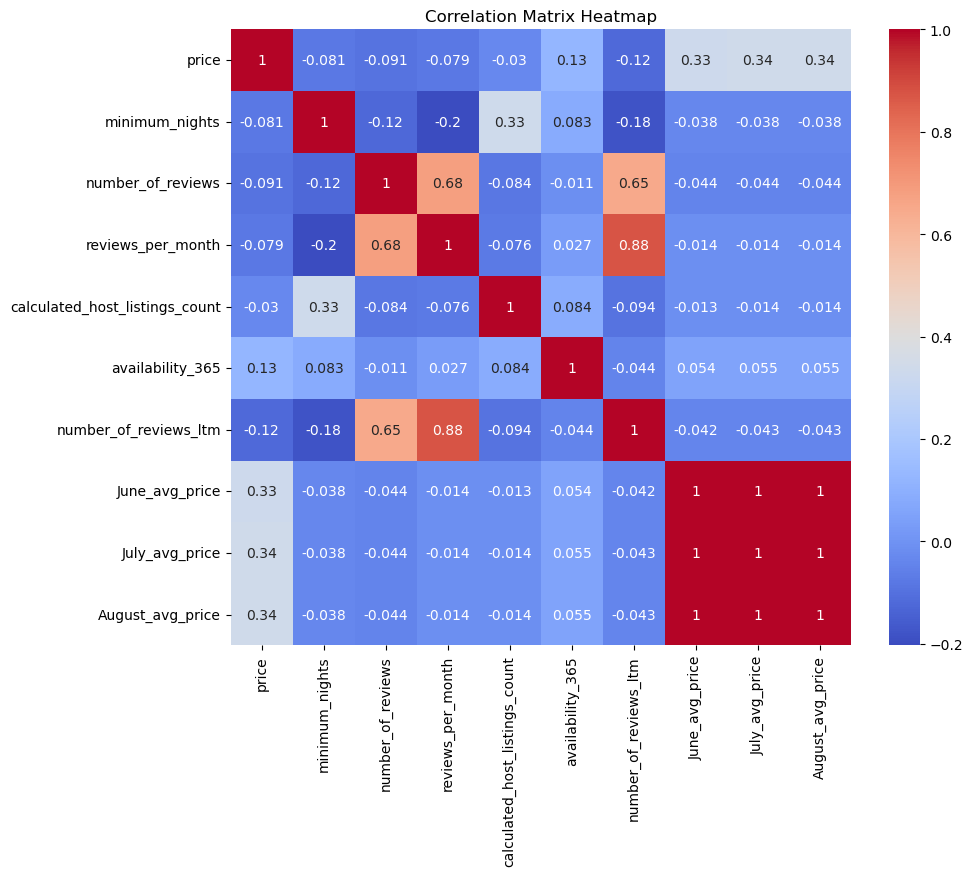

In [46]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), 
            annot=True, 
            cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

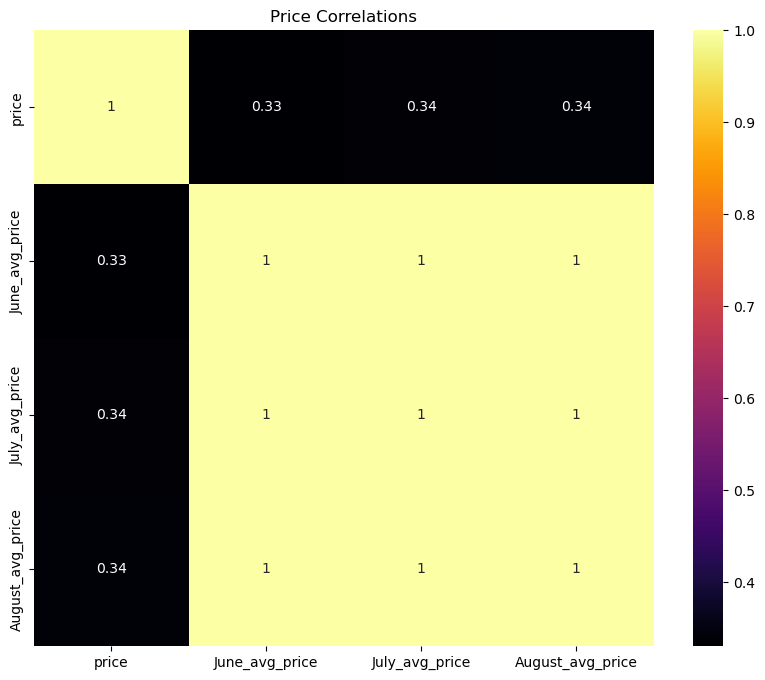

In [47]:
# Correlation map for prices 
prices_only=numeric_df[['price','June_avg_price','July_avg_price','August_avg_price']]
plt.figure(figsize=(10, 8))
sns.heatmap(prices_only.corr(), 
            annot=True, 
            cmap='inferno')
plt.title('Price Correlations')
plt.show()

In [48]:
combined_df

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,June_avg_price,July_avg_price,August_avg_price
0,5396,7903,Hôtel-de-Ville,48.852470,2.358350,Entire home/apt,88.0,3,425,2024-11-23,2.26,1,77,51,150.0,150.0,150.0
1,9952,33534,Popincourt,48.862380,2.369570,Entire home/apt,150.0,4,52,2024-09-24,0.36,1,250,3,80.0,80.0,80.0
2,11487,42666,Popincourt,48.863510,2.371100,Entire home/apt,80.0,30,13,2024-09-27,0.09,2,246,5,60.0,60.0,60.0
3,12452,48733,Popincourt,48.859740,2.379320,Entire home/apt,201.0,1,62,2024-10-11,0.77,1,34,4,200.0,200.0,200.0
4,17287,64055,Buttes-Chaumont,48.897720,2.385080,Entire home/apt,82.0,4,48,2024-11-01,0.39,1,234,15,89.0,89.0,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38905,1112874033769166914,563392445,Buttes-Montmartre,48.892186,2.346931,Entire home/apt,138.0,30,2,2024-11-30,0.23,6,360,2,102.0,102.0,102.0
38906,1112876048231231888,563392445,Buttes-Montmartre,48.892186,2.346931,Entire home/apt,89.0,30,4,2024-11-04,0.46,6,260,4,102.0,102.0,102.0
38907,1112876049566081626,563392445,Buttes-Montmartre,48.892186,2.346931,Entire home/apt,147.0,30,5,2024-08-18,0.58,6,350,5,102.0,102.0,102.0
38908,1112876050328173970,563392445,Buttes-Montmartre,48.892186,2.346931,Entire home/apt,147.0,30,5,2024-09-18,0.58,6,360,5,102.0,102.0,102.0


In [49]:
neighbourhood_grouped = combined_df[['neighbourhood','price','reviews_per_month','availability_365','minimum_nights']]
neighbourhood_grouped.head(18)


,neighbourhood,price,reviews_per_month,availability_365,minimum_nights
0,Hôtel-de-Ville,88.0,2.26,77,3
1,Popincourt,150.0,0.36,250,4
2,Popincourt,80.0,0.09,246,30
3,Popincourt,201.0,0.77,34,1
4,Buttes-Chaumont,82.0,0.39,234,4
5,Louvre,1200.0,1.12,365,4
6,Reuilly,200.0,0.72,324,2
7,Élysée,150.0,0.74,86,2
8,Vaugirard,180.0,0.94,3,4
9,Buttes-Chaumont,150.0,0.46,70,5


In [50]:
# Breaking the neighbourhoods into groups
central_paris = ["Hôtel-de-Ville", "Louvre", "Palais-Bourbon", "Bourse", "Opéra", "Panthéon"]
north_paris = ["Buttes-Montmartre", "Batignolles-Monceau", "Élysée"]
east_paris = ["Popincourt", "Buttes-Chaumont", "Ménilmontant", "Temple", "Entrepôt"]
west_paris = ["Passy", "Luxembourg"]
south_paris = ["Gobelins", "Observatoire", "Vaugirard", "Reuilly"]

# Assign 'Region' based on the neighbourhood using if-elif
def assign_region(neighbourhood):
    if neighbourhood in central_paris:
        return 'Central Paris'
    elif neighbourhood in north_paris:
        return 'North Paris'
    elif neighbourhood in east_paris:
        return 'East Paris'
    elif neighbourhood in west_paris:
        return 'West Paris'
    elif neighbourhood in south_paris:
        return 'South Paris'
    else:
        return 'Unknown'  # In case a neighbourhood doesn't match any list

# Apply the function to the DataFrame
neighbourhood_grouped['Region'] = neighbourhood_grouped['neighbourhood'].apply(assign_region)

# Display unique neighborhoods and their counts
unique_neighbourhoods = neighbourhood_grouped['neighbourhood'].value_counts().reset_index()
unique_neighbourhoods.columns = ['Neighbourhood', 'Count']
print("Unique Neighbourhoods with Counts:\n", unique_neighbourhoods)

# Group by the 'Region' column and aggregate neighborhoods in lists
grouped_data = neighbourhood_grouped.groupby('Region').agg(list).reset_index()
print("\nGrouped Data by Region:\n", grouped_data)


Unique Neighbourhoods with Counts:
           Neighbourhood  Count
0     Buttes-Montmartre   3920
1            Popincourt   3221
2             Vaugirard   2863
3                 Passy   2686
4              Entrepôt   2605
5   Batignolles-Monceau   2600
6                 Opéra   2035
7                Temple   2015
8       Buttes-Chaumont   1910
9          Ménilmontant   1907
10               Bourse   1611
11               Élysée   1477
12       Hôtel-de-Ville   1414
13              Reuilly   1350
14         Observatoire   1329
15             Panthéon   1281
16           Luxembourg   1269
17       Palais-Bourbon   1245
18               Louvre   1092
19             Gobelins   1080

Grouped Data by Region:
           Region                                      neighbourhood  \
0  Central Paris  [Hôtel-de-Ville, Louvre, Palais-Bourbon, Hôtel...   
1     East Paris  [Popincourt, Popincourt, Popincourt, Buttes-Ch...   
2    North Paris  [Élysée, Buttes-Montmartre, Buttes-Montmartre,...   
3  

C:\Users\Stelios PC\AppData\Local\Temp\ipykernel_5152\2270570168.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbourhood_grouped['Region'] = neighbourhood_grouped['neighbourhood'].apply(assign_region)


We grouped the neighborhoods into broad “Central,” “North,” “West,” “East,” and “South” categories for simplicity and ease of analysis, rather than using more granular or official boundaries. This approach makes it straightforward to compare overall patterns (e.g., housing prices, tourist activity) across the city without getting bogged down in each individual arrondissement. However, it’s important to remember that these groupings are somewhat subjective—Paris doesn’t have a strict definition of what counts as “North” or “Central.” By clearly stating our grouping criteria up front, we can give a high‐level overview of spatial trends while acknowledging that a more detailed analysis might use arrondissement‐level or neighborhood‐level divisions.

In [51]:
neighbourhood_grouped.head()

,neighbourhood,price,reviews_per_month,availability_365,minimum_nights,Region
0,Hôtel-de-Ville,88.0,2.26,77,3,Central Paris
1,Popincourt,150.0,0.36,250,4,East Paris
2,Popincourt,80.0,0.09,246,30,East Paris
3,Popincourt,201.0,0.77,34,1,East Paris
4,Buttes-Chaumont,82.0,0.39,234,4,East Paris


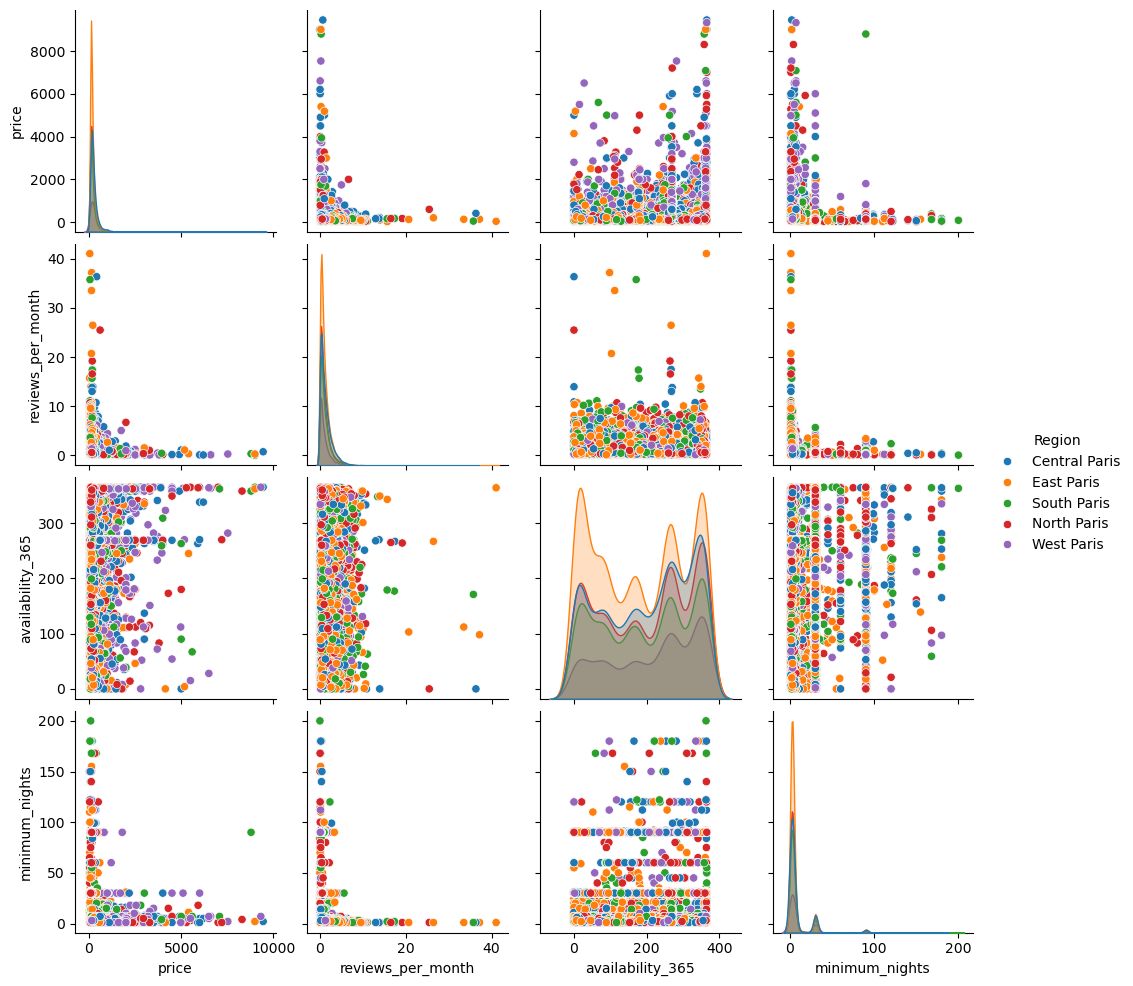

In [52]:
# Pair plot on neighbourhoods
sns.pairplot(neighbourhood_grouped, hue='Region')
plt.show()

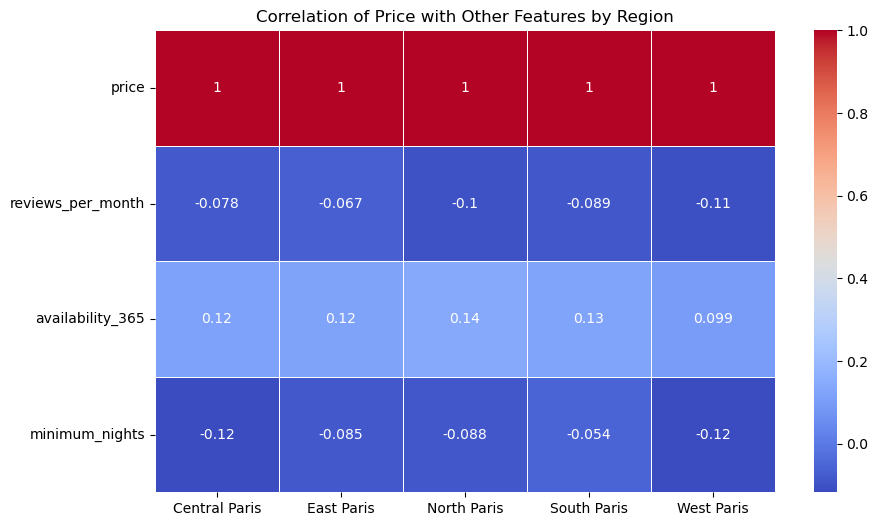

In [53]:
# Create an empty DataFrame to store correlations by region
correlation_by_region = pd.DataFrame()

# Iterate through each region and compute correlations with 'price'
for region, data in neighbourhood_grouped.groupby('Region'):
    # Select numeric columns only
    numeric_data = data.select_dtypes(include=['float64', 'int64'])
    # Compute correlation with 'price'
    correlation_data = numeric_data.corr()[['price']].rename(columns={'price': region})
    correlation_by_region = pd.concat([correlation_by_region, correlation_data], axis=1)

# Plot the combined heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_by_region, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation of Price with Other Features by Region')
plt.show()


In [54]:
# Apply the region assignment
combined_df['Region'] = combined_df['neighbourhood'].apply(assign_region)

# Group by 'Region' and calculate average price and count per region
region_summary = combined_df.groupby('Region').agg(
    average_price=('price', 'mean'),
    count=('price', 'count')
).reset_index()

# Return the DataFrame
region_summary

,Region,average_price,count
0,Central Paris,270.642890,8678
1,East Paris,191.553954,11658
2,North Paris,235.094285,7997
3,South Paris,207.321655,6622
4,West Paris,348.199747,3955


C:\Users\Stelios PC\AppData\Local\Temp\ipykernel_5152\2427577241.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='average_price', data=region_summary, palette='Set2')


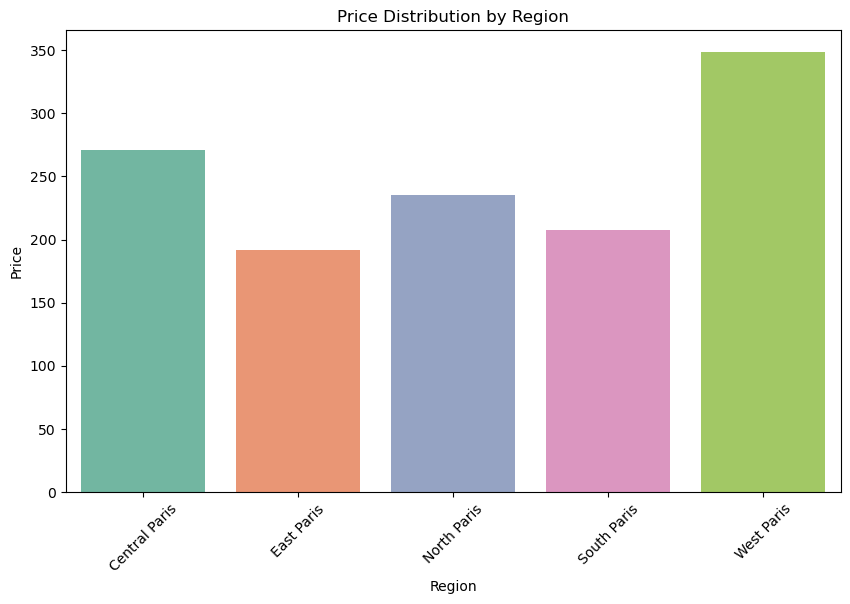

In [55]:
# Create a box plot for price distribution by region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='average_price', data=region_summary, palette='Set2')
plt.title('Price Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# Question 2

In [56]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [57]:
combined_df.head()

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,June_avg_price,July_avg_price,August_avg_price,Region
0,5396,7903,Hôtel-de-Ville,48.85247,2.35835,Entire home/apt,88.0,3,425,2024-11-23,2.26,1,77,51,150.0,150.0,150.0,Central Paris
1,9952,33534,Popincourt,48.86238,2.36957,Entire home/apt,150.0,4,52,2024-09-24,0.36,1,250,3,80.0,80.0,80.0,East Paris
2,11487,42666,Popincourt,48.86351,2.37110,Entire home/apt,80.0,30,13,2024-09-27,0.09,2,246,5,60.0,60.0,60.0,East Paris
3,12452,48733,Popincourt,48.85974,2.37932,Entire home/apt,201.0,1,62,2024-10-11,0.77,1,34,4,200.0,200.0,200.0,East Paris
4,17287,64055,Buttes-Chaumont,48.89772,2.38508,Entire home/apt,82.0,4,48,2024-11-01,0.39,1,234,15,89.0,89.0,89.0,East Paris


In [58]:
X = combined_df[["price", "number_of_reviews",'availability_365']]
km = KMeans(n_clusters = 3, random_state = 1)
km.fit(X)

KMeans(n_clusters=3, random_state=1)

In [59]:
km.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2]), array([36566,   112,  2232], dtype=int64))

In [61]:
combined_df['cluster'] = km.labels_
combined_df.head()

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,June_avg_price,July_avg_price,August_avg_price,Region,cluster
0,5396,7903,Hôtel-de-Ville,48.85247,2.35835,Entire home/apt,88.0,3,425,2024-11-23,2.26,1,77,51,150.0,150.0,150.0,Central Paris,0
1,9952,33534,Popincourt,48.86238,2.36957,Entire home/apt,150.0,4,52,2024-09-24,0.36,1,250,3,80.0,80.0,80.0,East Paris,0
2,11487,42666,Popincourt,48.86351,2.37110,Entire home/apt,80.0,30,13,2024-09-27,0.09,2,246,5,60.0,60.0,60.0,East Paris,0
3,12452,48733,Popincourt,48.85974,2.37932,Entire home/apt,201.0,1,62,2024-10-11,0.77,1,34,4,200.0,200.0,200.0,East Paris,0
4,17287,64055,Buttes-Chaumont,48.89772,2.38508,Entire home/apt,82.0,4,48,2024-11-01,0.39,1,234,15,89.0,89.0,89.0,East Paris,0


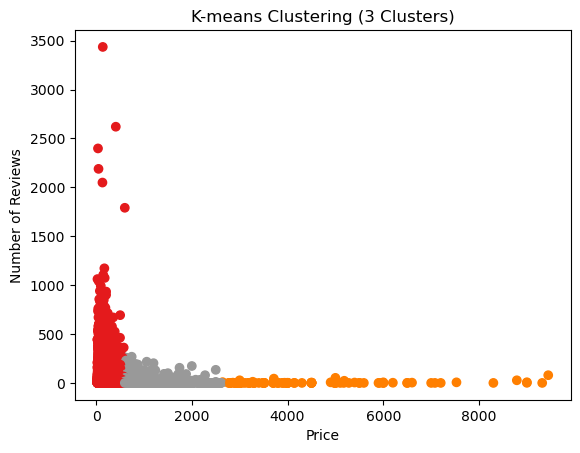

In [62]:
plt.scatter(X["price"], X["number_of_reviews"], c=km.labels_, cmap = 'Set1')
plt.xlabel("Price")
plt.ylabel("Number of Reviews")
plt.title("K-means Clustering (3 Clusters)")
plt.show()

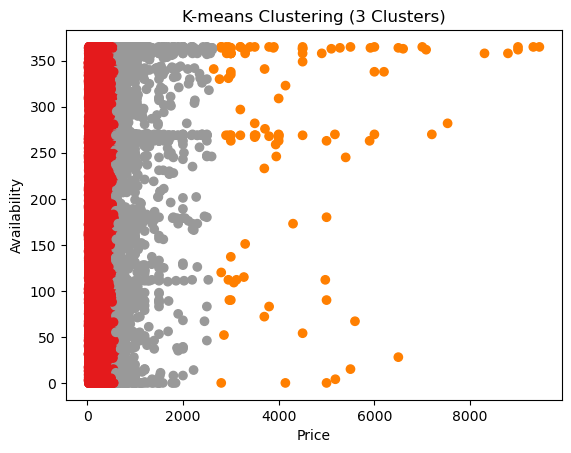

In [63]:
plt.scatter(X["price"], X["availability_365"], c=km.labels_, cmap = 'Set1')
plt.xlabel("Price")
plt.ylabel("Availability")
plt.title("K-means Clustering (3 Clusters)")
plt.show()

#Question 3

In [64]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [65]:
numeric_df.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,June_avg_price,July_avg_price,August_avg_price
0,88.0,3,425,2.26,1,77,51,150.0,150.0,150.0
1,150.0,4,52,0.36,1,250,3,80.0,80.0,80.0
2,80.0,30,13,0.09,2,246,5,60.0,60.0,60.0
3,201.0,1,62,0.77,1,34,4,200.0,200.0,200.0
4,82.0,4,48,0.39,1,234,15,89.0,89.0,89.0


In [ ]:
features=
target_x=